## Sequential change detection with polarimetric SAR imagery

In [1]:
%matplotlib inline

__Sentinel 1 data over the Camargue__

In [23]:
ls -l /home/imagery | grep -v "_enl" | grep -v "_cmap" | grep -v "_fmap" | grep -v "_warp" | grep -v "_sub"

total 2168620
-rw-r----- 1 1000 1000 233402195 Dec  7 17:42 S1A_IW_SLC__1SDV_20141108T054351_20141108T054421_003186_003AB4_B367.tif
-rw-r----- 1 1000 1000 233345149 Dec  7 18:13 S1A_IW_SLC__1SDV_20141202T054350_20141202T054420_003536_004299_33DA.tif
-rw-r----- 1 1000 1000 235138724 Dec  7 18:22 S1A_IW_SLC__1SDV_20150131T054348_20150131T054418_004411_005642_4935.tif
-rw-r----- 1 1000 1000 234845748 Dec  7 18:22 S1A_IW_SLC__1SDV_20150224T054348_20150224T054418_004761_005E71_4E6C.tif
-rw-r----- 1 1000 1000 220545024 Dec  7 19:00 S1A_IW_SLC__1SDV_20150308T054348_20150308T054418_004936_0062B3_71EF.tif
-rw-r----- 1 1000 1000 237035941 Dec  7 19:11 S1A_IW_SLC__1SDV_20150401T054349_20150401T054416_005286_006AFC_1D4E.tif
-rw-r----- 1 1000 1000 235231119 Dec  7 20:16 S1A_IW_SLC__1SDV_20150507T054353_20150507T054421_005811_00778F_5C61.tif
-rw-r----- 1 1000 1000 235176014 Dec  7 20:15 S1A_IW_SLC__1SDV_20150612T054355_20150612T054423_006336_008554_0214.tif
-rw-r----- 1 1000 1000 235104036 Dec  7 20

__Spatial subset__

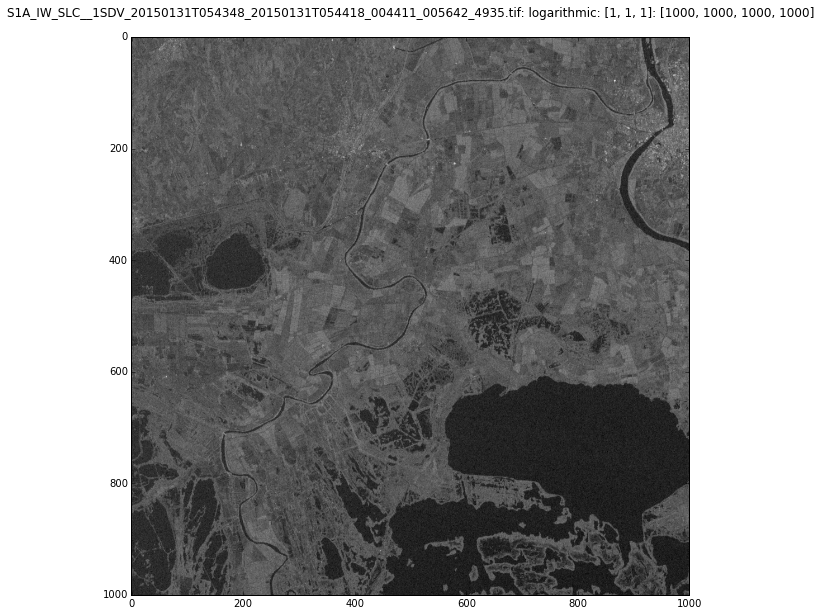

In [24]:
run /home/dispms  -d [1000,1000,1000,1000] -f /home/imagery/S1A_IW_SLC__1SDV_20150131T054348_20150131T054418_004411_005642_4935.tif

__Running sar_seq on 6 images (20150308 is corrupted)__

In [2]:
!/home/sar_seq_s1.sh 20150131 20150224 20150401 20150507 20150612 20151010 [1000,1000,1000,1000] 12 0.01

***** Multitemporal PolSAR Change Detection **********
******************************************************
number of images  6
ENL               12
spatial subset    [1000,1000,1000,1000]
     Register SAR
Sat Feb 27 14:42:10 2016
Reference image:
 /home/imagery/S1A_IW_SLC__1SDV_20150131T054348_20150131T054418_004411_005642_4935.tif
Target image:
 /home/imagery/S1A_IW_SLC__1SDV_20150224T054348_20150224T054418_004761_005E71_4E6C.tif
warping 4 bands (dual pol)...
elapsed time: 37.8310370445
Warped image written to: /home/imagery/S1A_IW_SLC__1SDV_20150224T054348_20150224T054418_004761_005E71_4E6C_warp.tif
     Register SAR
Sat Feb 27 14:42:48 2016
Reference image:
 /home/imagery/S1A_IW_SLC__1SDV_20150131T054348_20150131T054418_004411_005642_4935.tif
Target image:
 /home/imagery/S1A_IW_SLC__1SDV_20150401T054349_20150401T054416_005286_006AFC_1D4E.tif
warping 4 bands (dual pol)...
elapsed time: 37.7704191208
Warped image written to: /home/imagery/S1A_IW_SLC__1SDV_20150401T054349_20150401T

__Here are all the changes in a small subset, classified according to the time of the most recent change:__

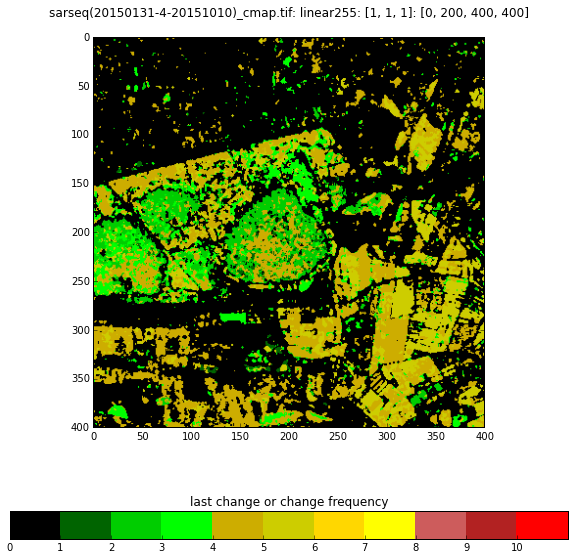

In [26]:
run /home/dispms -c [1,2,3,4,5] -e 1 -d [0,200,400,400] -f /home/imagery/sarseq(20150131-4-20151010)_cmap.tif

__Here are all the changes, classified according to frequency:__

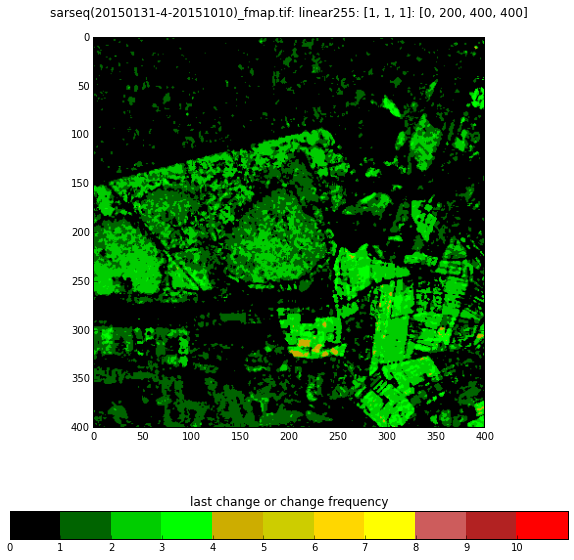

In [25]:
run /home/dispms -c [1,2,3,4,5] -e 1 -d [0,200,400,400] -f /home/imagery/sarseq(20150131-4-20151010)_fmap.tif

__Here are the most frequent changes (4 or 5):__

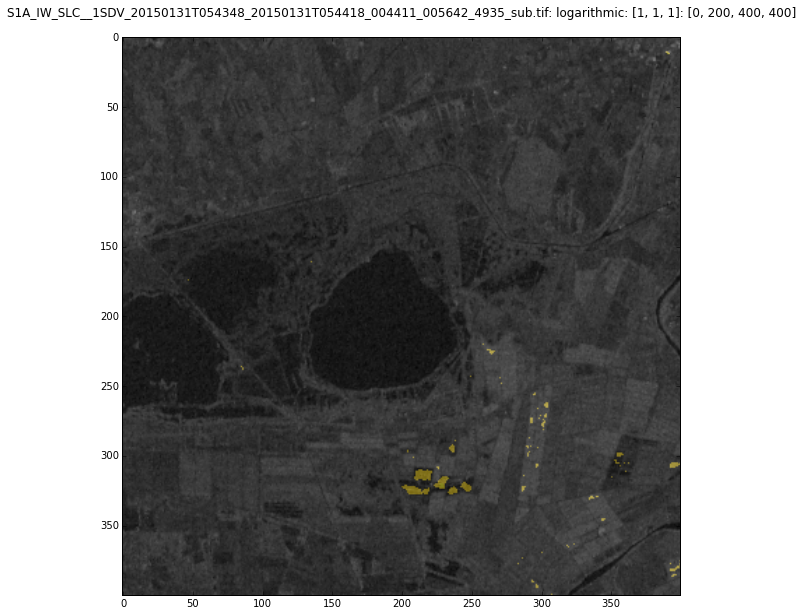

In [6]:
run /home/dispms -d [0,200,400,400] \
-C [4,5] -E 1 -D [0,200,400,400] \
-o 0.5 \
-f /home/imagery/S1A_IW_SLC__1SDV_20150131T054348_20150131T054418_004411_005642_4935_sub.tif \
-F /home/imagery/sarseq(20150131-4-20151010)_fmap.tif